In [10]:
 %matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_csv = pd.read_csv(city_data_to_load)
ride_csv = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

city_ride_df = pd.merge(city_csv, ride_csv, on="city", how="left")

# Display the data table for preview

city_ride_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


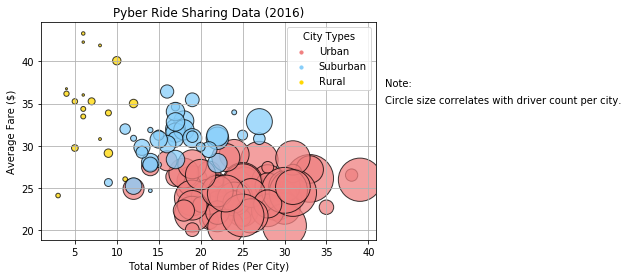

In [11]:
# Obtain the x and y coordinates for each of the three city types

df_count = city_ride_df.groupby(["city", "type"]).count()

df_count = df_count.reset_index()

df_count = df_count.set_index("city")


df_mean = city_ride_df.groupby(["city", "type"]).mean()

df_mean = df_mean.reset_index()

df_mean = df_mean.set_index("city")


df_sum = city_ride_df.groupby(["city", "type"]).sum()

df_sum = df_sum.reset_index()

df_sum = df_sum.set_index("city")

rural_total_rides = df_count.loc[df_count["type"] == "Rural"]["ride_id"]
rural_avg_fare = round(df_mean.loc[df_mean["type"] == "Rural"]["fare"],2)
rural_driver_count = df_sum.loc[df_sum["type"] == "Rural"]["driver_count"]

sub_total_rides = df_count.loc[df_count["type"] == "Suburban"]["ride_id"]
sub_avg_fare = round(df_mean.loc[df_mean["type"] == "Suburban"]["fare"],2)
sub_driver_count = df_sum.loc[df_sum["type"] == "Suburban"]["driver_count"]

urb_total_rides = df_count.loc[df_count["type"] == "Urban"]["ride_id"]
urb_avg_fare = round(df_mean.loc[df_mean["type"] == "Urban"]["fare"],2)
urb_driver_count = df_sum.loc[df_sum["type"] == "Urban"]["driver_count"]

# Build the scatter plots for each city types

plt.scatter(urb_total_rides, urb_avg_fare, s=urb_driver_count, marker ="o", color="lightcoral", alpha=0.75, edgecolors="black")
plt.scatter(sub_total_rides, sub_avg_fare, s=sub_driver_count, marker ="o", color="lightskyblue", alpha=0.75, edgecolors="black")
plt.scatter(rural_total_rides, rural_avg_fare, s=rural_driver_count, marker ="o", color="gold", alpha=0.75, edgecolors="black")
plt.grid()

# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.text(42,37, "Note:")
plt.text(42,35, "Circle size correlates with driver count per city.")
plt.grid(True)

# Create a legend
# Incorporate a text label regarding circle size

urb = plt.scatter([],[], s=10, marker = "o", color = "lightcoral")
sub = plt.scatter([],[], s=10, marker = "o", color = "lightskyblue")
rur = plt.scatter([],[], s=10, marker = "o", color = "gold")
plt.legend((urb, sub, rur), ("Urban", "Suburban", "Rural"), loc='best', title="City Types")


# Save Figure and show plot

plt.savefig("Images/Pyber_Ride_Sharing_Data_2016.png")

plt.show()


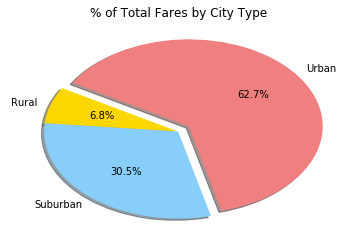

In [12]:
# Calculate Type Percents

pct_fares = city_ride_df.groupby("type").sum()

pct_fares = pct_fares["fare"]/pct_fares["fare"].sum()

# Build Pie Chart

types = ["Rural", "Suburban", "Urban"]

colors = ["gold", "lightskyblue", "lightcoral"]

explode = (0,0,.1)

plt.title("% of Total Fares by City Type")
plt.pie(pct_fares, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)

# Save Figure and show plot

plt.savefig("Images/Total_Fares_City_Type.png")

plt.show()

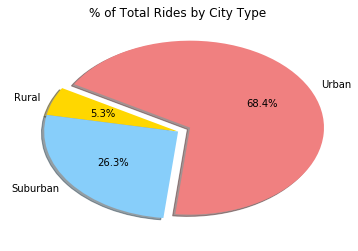

In [13]:
# Calculate Ride Percents

pct_rides = city_ride_df.groupby("type").count()

pct_rides = pct_rides["ride_id"]/pct_rides["ride_id"].count()

# Build Pie Chart

types = ["Rural", "Suburban", "Urban"]

colors = ["gold", "lightskyblue", "lightcoral"]

explode = (0,0,.1)

plt.title("% of Total Rides by City Type")
plt.pie(pct_rides, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)

# Save Figure and show plot

plt.savefig("Images/Total_Rides_City_Type.png")

plt.show()

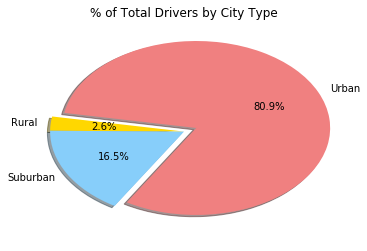

In [14]:
# Calculate Driver Percents

pct_drivers = city_ride_df.drop_duplicates("city")

pct_drivers = pct_drivers.groupby("type").sum()

pct_drivers = pct_drivers["driver_count"]/pct_drivers["driver_count"].sum()

# Build Pie Charts

types = ["Rural", "Suburban", "Urban"]

colors = ["gold", "lightskyblue", "lightcoral"]

explode = (0,0,.1)

plt.title("% of Total Drivers by City Type")
plt.pie(pct_drivers, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=170)

# Save Figure and show plot

plt.savefig("Images/Total_Drivers_City_Type.png")

plt.show()